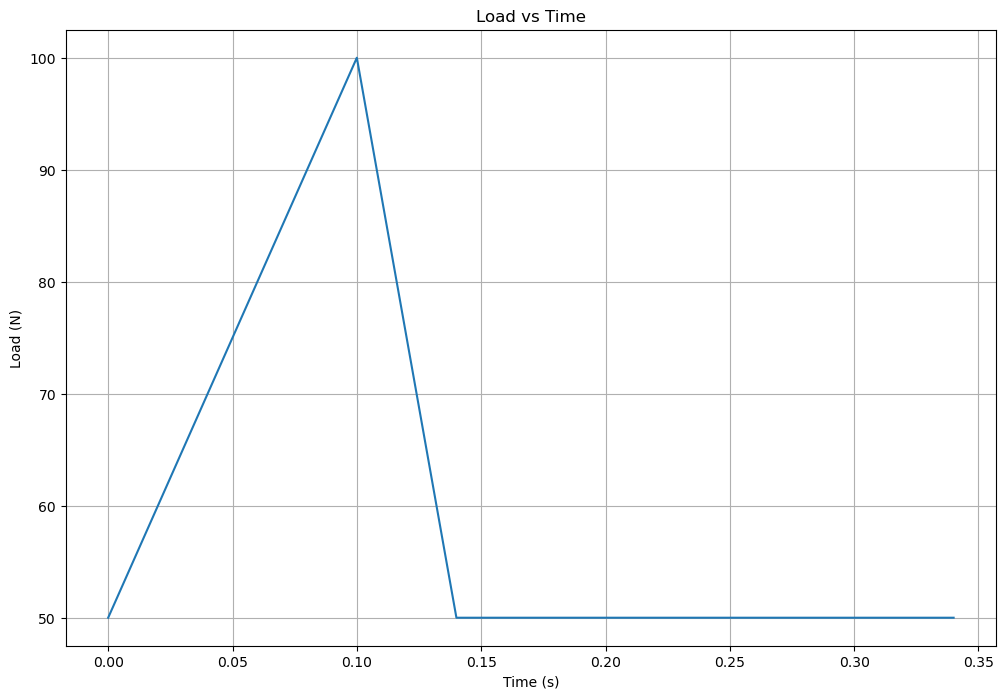

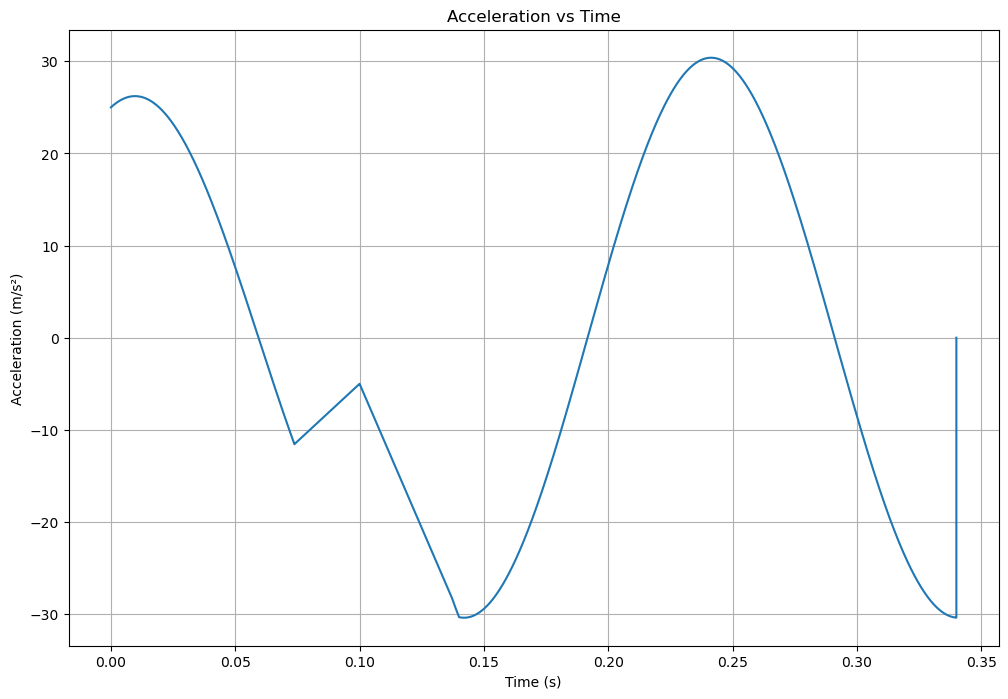

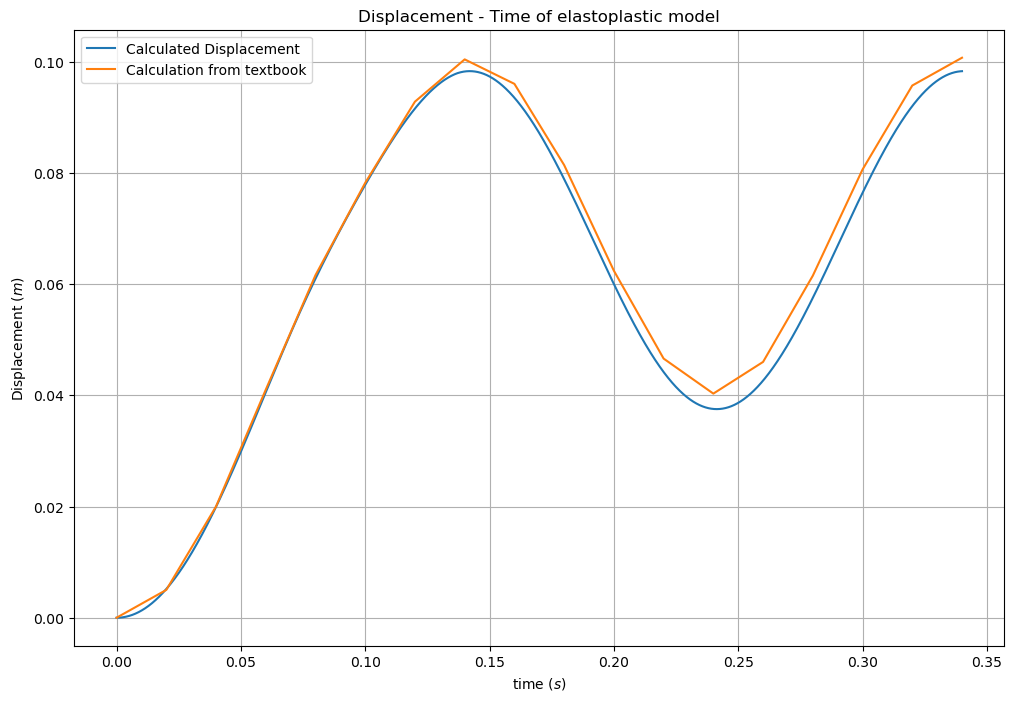

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

# To calculate the natural period of the system
def get_natural_period(M, k):
    return (2 * np.pi * math.sqrt(M)) / math.sqrt(k)

#To calculate the load against the time of application of load
def get_load_value(x):
    if x >= range_a_start and x <= range_a_end:
        term_B = (500*x) + 50
        return term_B
    elif x > range_b_start and x <= range_b_end:
        term_B = (-1250 * x) + 225
        return term_B
    else:
        return 50

#Load domain data
range_a_start = 0.0                                   #Linear Load line initial limit
range_a_end = 0.10                                    #Linear Load line final limit
range_b_start = 0.10                                  #Linear Load line initial limit
range_b_end = 0.14                                    #Linear Load line final limit


# Material properties
k = 2000        #stiffness of the spring (lb/ft)
W = 64.4        #Weight of the beam (lb)
M = 2           #Mass of beam (lb-sec^2/ft)
Rm = 110        #Resistance (lb)

# Calculation of Elastic Limit
yel = Rm / k
ym=1.78*yel

# Calculation of time step
T = 0.34           # Total time (sec)
reduction_factor = 0.00001

natural_period = get_natural_period(M, k)  # Calculate the natural period of the system
delta_t = natural_period * reduction_factor  # Apply reduction factor and calculate the time step delta_t
n_t_steps = int(T / delta_t)  # Number of time steps
t = np.linspace(0, T, n_t_steps)  # Initialize the time domain

# Load array
Load = np.array([get_load_value(time) for time in t])

# Displacement and acceleration arrays
Disp = np.zeros(n_t_steps)
Acc = np.zeros(n_t_steps)

# Initial conditions
Disp[0] = 0
Acc[0] = 0
Trip = 0

# Displacement calculation loop
for count in range(n_t_steps - 1):
    if Trip == 0:
        if Disp[count] < yel:
            Acc[count] = (Load[count] - k * Disp[count]) / M
        elif Disp[count] <= ym:
            Acc[count] = (Load[count] - Rm) / M

        if Disp[count] >= ym:
            Trip = 1
            Disp[count] = ym

    if Trip == 1:
        Acc[count] = (Load[count] - Rm + k * (ym - Disp[count])) / M

    # Update displacement using Newmark-beta method
    if count == 0:
        Disp[count + 1] = 0.5 * Acc[count] * delta_t ** 2
    else:
        Disp[count + 1] = 2 * Disp[count] - Disp[count - 1] + Acc[count] * delta_t ** 2

        
# Define the time array
t_1 = np.arange(0, 0.34+0.02, 0.02)

# Define the y array
y = [0, 0.0050,0.02,0.041, 0.0616, 0.0782, 0.0928, 0.1004, 0.0960,0.0814, 0.0624, 0.0466, 0.0403, 0.046, 0.0615, 0.0806, 0.0957, 0.1007]
        
# Plot Load vs Time
plt.figure(figsize=(12, 8))
plt.plot(t, Load)
plt.xlabel('Time (s)')
plt.ylabel('Load (N)')
plt.title('Load vs Time')
plt.grid()
plt.show()

# Plot Acceleration vs Time
plt.figure(figsize=(12, 8))
plt.plot(t, Acc)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time')
plt.grid()
plt.show()

# Plot Displacement
plt.figure(figsize=(12, 8))
plt.plot(t, Disp, label='Calculated Displacement')
plt.plot(t_1, y[:len(t_1)], label='Calculation from textbook')
plt.xlabel('time ($s$)')
plt.ylabel('Displacement ($m$)')
plt.title('Displacement - Time of elastoplastic model')
plt.legend()
plt.grid()
plt.show()


